In [1]:
import csv
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import power_transform

med = []
random.seed(1229)
target = random.choice(range(10))
print(target)

with open(r"C:\Users\86139\Desktop\西北大学\IEMS308\Cluster\Medicare_Provider_Util_Payment_PUF_CY2017.txt") as f:
    csv_reader = csv.reader(f, delimiter = '\t')
    line_count = 0
    column_names = np.array(next(csv_reader))
    count = 0
    next(csv_reader)
    for row in csv_reader:
        my_dice = random.choice(range(10))
        if my_dice == target:
            med.append(row)
        line_count += 1
        count += 1
        if line_count >= 100000:
            break

raw_data = np.array(med)
f.close()

2


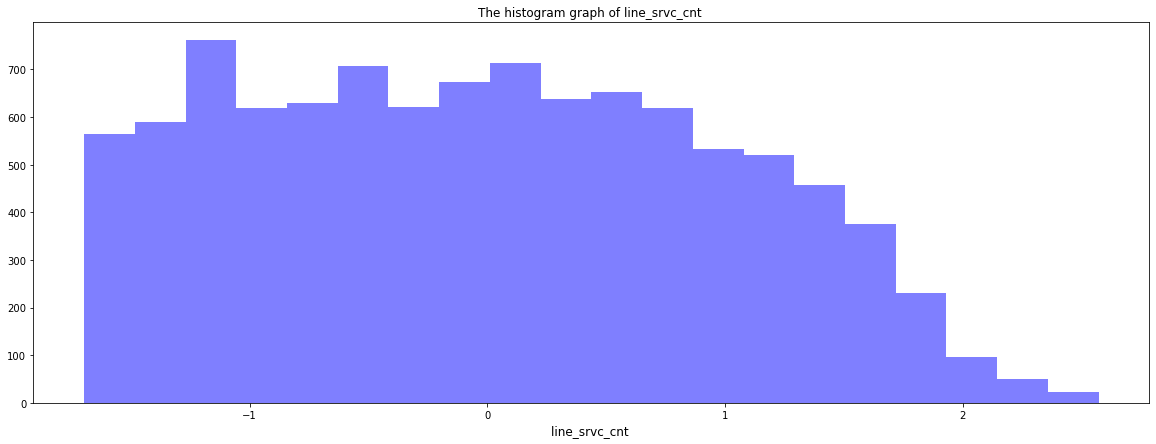

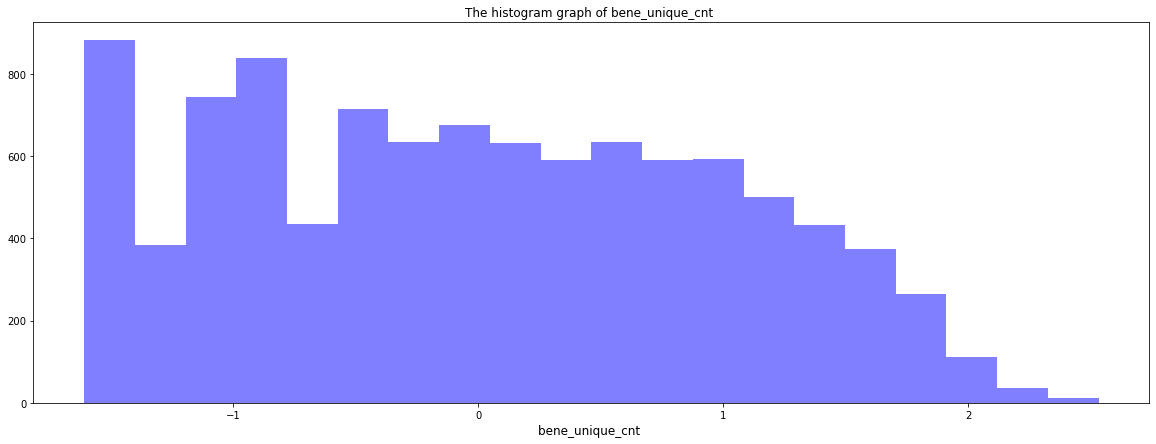

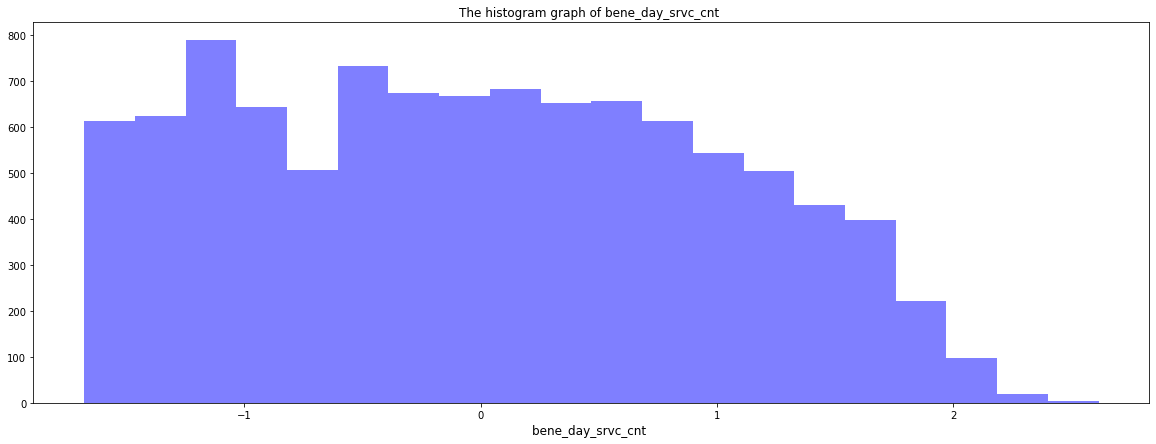

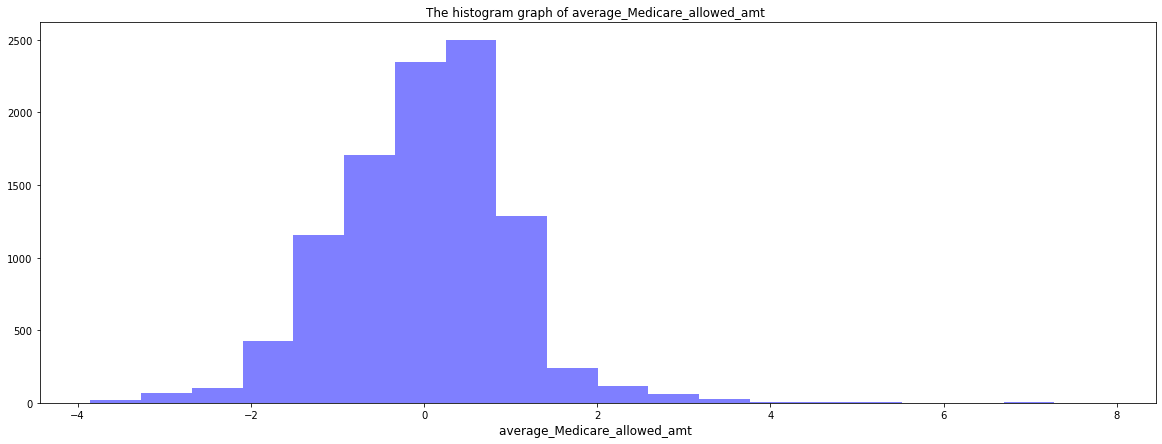

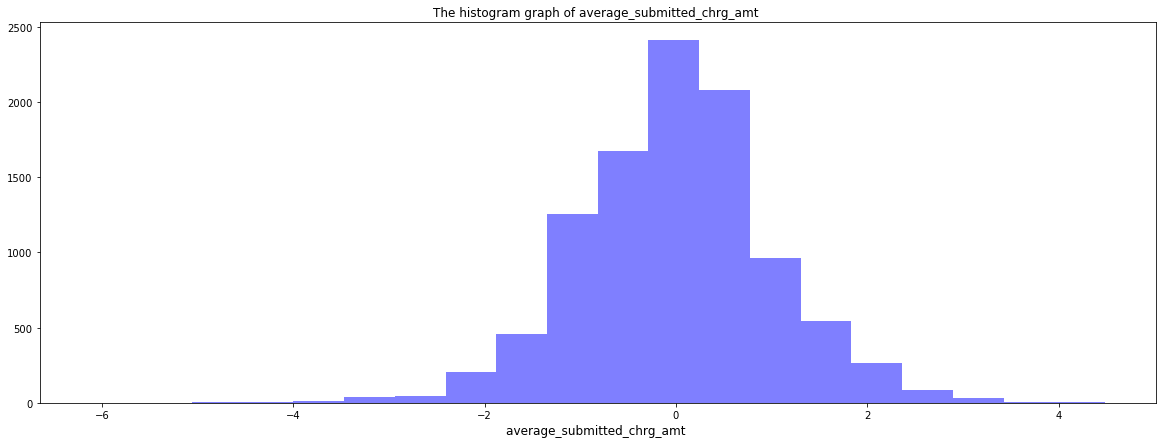

In [2]:
# Box-cox EDA

his_nume = power_transform(raw_data[:, 19:24], method='box-cox')
for i in range(5):
    fig, ax = plt.subplots(figsize=(20,7))
    his_temp = his_nume[:, i]
    num_bins = 20
    n, bins, patches = plt.hist(his_temp, num_bins, facecolor='blue', alpha=0.5)
    ax.set_xlabel("%s "%column_names[i+19], fontsize=12)
    ax.set_title("The histogram graph of %s "%column_names[i+19])
    plt.show()

In [3]:
# Delete Outlier
outliers_nume = his_nume
delete = []
bar_high = np.mean(outliers_nume, 0) + 2 * np.std(outliers_nume, 0)
bar_low = np.mean(outliers_nume, 0) - 2 * np.std(outliers_nume, 0)
for i in range(outliers_nume.shape[0]):
    for j in range(outliers_nume.shape[1]):
        target = outliers_nume[i,j]
        if target > bar_high[j] or target < bar_low[j]:
            delete.append(i)
            break
temp_df = pd.DataFrame(raw_data[delete])
data = np.delete(raw_data, delete, axis = 0)
temp_df



0         1          2  3           4  5  6   \
0    1003000597       KIM        DAE  Y  M.D., PH.D  M  I   
1    1003001462    WOLSKI     MICHAL  J          MD  M  I   
2    1003001785     JONES     JACLYN  C        D.O.  F  I   
3    1003002072  GOTESMAN  ALEXANDER           M.D.  M  I   
4    1003002312   HOPKINS   PATRICIA  T        M.D.  F  I   
..          ...       ...        ... ..         ... .. ..   
817  1013003136    GREENE    BRENNAN  P          MD  M  I   
818  1013004555    DUMONT      KAREN  M        RPAC  F  I   
819  1013005412     PATEL      VIPUL  R         DPM  M  I   
820  1013005867  PACACCIO    DOUGLAS            DPM  M  I   
821  1013007707      CHEN  CHU KUANG             MD  M  I   

                                     7                                8   \
0                      1145 S UTICA AVE                        SUITE 202   
1                        2401 S 31ST ST                                    
2                      1245 S UTICA AVE                                    
3    1374 WHITEHORSE HAMILTON SQUARE RD                                    
4                500 CONGRESS ST STE 1B                                    
..                                  ...                              ...   
817                      1536 STORY AVE  THE EYE CARE INSTITUTE BUILDING   
818                      220 STEUBEN ST                                    
819              421 ADAM SHEPHERD PKWY                        SUITE 100   
820                   215 HILLCREST AVE                          SUITE B   
821                  253 WITHERSPOON ST                                    

                 9   ...     16  \
0             TULSA  ...  81002   
1            TEMPLE  ...  G6015   
2             TULSA  ...  J3301   
3          HAMILTON  ...  J0696   
4            QUINCY  ...  J9250   
..              ...  ...    ...   
817      LOUISVILLE  ...  66984   
818   MONTOUR FALLS  ...  99285   
819  SHEPHERDSVILLE  ...  J3301   
820       YORKVILLE  ...  J3301   
821       PRINCETON  ...  64493   

                                                    17 18    19   20   21  \
0                              Urinalysis, manual test  N   132  116  132   
1    Intensity modulated treatment delivery, single...  N   667   34  666   
2    Injection, triamcinolone acetonide, not otherw...  Y   399   76  108   
3            Injection, ceftriaxone sodium, per 250 mg  Y   244   58   61   
4                            Methotrexate sodium, 5 mg  Y  2547   55  511   
..                                                 ... ..   ...  ...  ...   
817         Removal of cataract with insertion of lens  N   234  167  234   
818  Emergency department visit, problem with signi...  N   279  253  279   
819  Injection, triamcinolone acetonide, not otherw...  Y    69   17   53   
820  Injection, triamcinolone acetonide, not otherw...  Y    54   37   54   
821  Injections of lower or sacral spine facet join...  N    19   16   19   

               22            23            24            25  
0            3.21             7  3.0804545455          3.43  
1           314.7          2032  245.38938531  274.26482759  
2    1.8333082707  3.4262406015  1.3621804511  1.3640601504  
3    0.6428278689           160  0.5039344262  0.5039344262  
4    0.2598979191  5.0009815469  0.1996976835  0.2006203377  
..            ...           ...           ...           ...  
817  612.78393162           900   478.3582906   511.2657265  
818        144.85          1874  112.01125448  115.62491039  
819  1.8279710145             6  1.3295652174  1.3295652174  
820  1.8368518519            10  1.3874074074  1.4172222222  
821  122.11578947  3518.6842105  95.736315789  90.482105263  

[822 rows x 26 columns]

In [4]:
# n_variance = np.var(nume, 0).astype(str)
# n_mean = np.mean(nume, 0).astype(str)
# n_std = np.std(nume, 0).astype(str)
# column_names = np.array(column_names)
# stat_parameter = np.insert(column_names[19:24], 0, ["Parameters"])
# n_variance = np.insert(n_variance, 0, ["Variance: "])
# n_std = np.insert(n_std, 0, ["Std: "])
# n_mean = np.insert(n_mean, 0, ["Mean: "])
# stat_parameter = np.row_stack((stat_parameter, n_mean, n_std, n_variance))
# df = pd.DataFrame(stat_parameter)
# df

NameError: name 'nume' is not defined

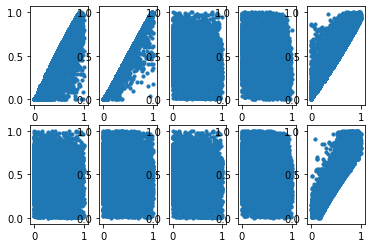

In [5]:
nume = np.delete(his_nume, delete, axis = 0)
standed_nume = (nume - np.min(nume, 0)) / (np.max(nume, 0) - np.min(nume, 0))
norm_nume = (nume - np.mean(nume, 0)) / np.std(nume, 0)
count = 0
for i in range(5):
    for j in range(i + 1, 5):
        plt.subplot(2, 5, count + 1)
        plt.scatter(standed_nume[:, i], standed_nume[:, j], s = 10)
        count += 1

In [6]:
# Processing credential column
credentials = np.array(data[:, 4])
for i in range(credentials.size):
    if re.match(r'a*M.*D', credentials[i]):
        credentials[i] = 'MD'
    elif re.match(r'a*D.*O', credentials[i]):
        credentials[i] = 'DO'
    elif re.match(r'a*O.*D', credentials[i]):
        credentials[i] = 'OD'
    elif re.match(r'a*P.*T', credentials[i]):
        credentials[i] = 'PT'
    elif re.match(r'a*M.*S', credentials[i]):
        credentials[i] = 'MS'
    elif re.match(r'a*P.*A', credentials[i]):
        credentials[i] = 'PA'
s_credentials = pd.Series(credentials)
cre_values = pd.value_counts(s_credentials)


cre_merge = np.array([],dtype = str)
for i in range(cre_values.size):
    if cre_values[i] < (credentials.size * 0.005):
        cre_merge = np.append(cre_merge, cre_values.index[i])
for i in range(credentials.size):
    if credentials[i] in cre_merge:
        credentials[i] = 'Other'
    if credentials[i] == "":
        credentials[i] = 'Organization'
s_credentials = pd.Series(credentials)
print(pd.value_counts(s_credentials))

cre_labelbinarizer = LabelBinarizer()
la_credentials = cre_labelbinarizer.fit_transform(s_credentials)
std_la_credentials = (la_credentials - np.min(la_credentials, 0)) / (np.max(la_credentials, 0) - np.min(la_credentials, 0))
norm_la_credentials = (la_credentials - np.mean(la_credentials, 0)) / np.std(la_credentials, 0)
print(std_la_credentials.shape)

MD              6365
Organization     597
DO               549
Other            469
PA               326
OD               168
PT               157
DPM              148
CRNA              99
NP                84
FNP               71
DPT               64
D.P.M.            58
MS                48
ARNP              48
dtype: int64
(9251, 15)


In [7]:
# Processing gender
gender = np.array(data[:, 5])
for i in range(gender.size):
    if gender[i] != 'M' and gender[i] != 'F':
        gender[i] = 'O'
# gender = np.delete(gender, delete)
s_gender = pd.Series(gender)
pd.value_counts(s_gender)

# Trying skilearn labelbinarizer
g_labelbinarizer = LabelBinarizer()
la_gender = g_labelbinarizer.fit_transform(s_gender)
std_la_gender = (la_gender - np.min(la_gender, 0)) / (np.max(la_gender, 0) - np.min(la_gender, 0))
norm_la_gender = (la_gender - np.mean(la_gender, 0)) / np.std(la_gender, 0)
print(std_la_gender.shape)



(9251, 3)


In [8]:
# Processing entitycode
# Not very useful, connection with gender
entity_code = np.array(data[:, 6])
for i in range(entity_code.size):
    if entity_code[i] != 'I' and entity_code[i] != 'O':
        entity_code[i] = 'U'
s_entity_code = pd.Series(entity_code)
print(pd.value_counts(s_entity_code))

e_labelbinarizer = LabelBinarizer()
la_e_code = e_labelbinarizer.fit_transform(s_entity_code)
std_la_entity_code = (la_e_code - np.min(la_e_code, 0)) / (np.max(la_e_code, 0) - np.min(la_e_code, 0))
norm_la_entity_code = (la_e_code - np.mean(la_e_code, 0)) / np.std(la_e_code, 0)
print(e_labelbinarizer.classes_)

I    8943
O     308
dtype: int64
['I' 'O']


In [9]:
# Processing state
state = np.array(data[:, 11])
s_state = pd.Series(state)

st_labelbinarizer = LabelBinarizer()
la_state = st_labelbinarizer.fit_transform(s_state)
std_la_state = (la_state - np.min(la_state, 0)) / (np.max(la_state, 0) - np.min(la_state, 0))
norm_la_state = (la_state - np.mean(la_state, 0)) / np.std(la_state, 0)
print(st_labelbinarizer.classes_)

['AE' 'AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'GU' 'HI'
 'IA' 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS'
 'MT' 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'PR'
 'RI' 'SC' 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']


In [10]:
# Processing country
# All from US, not useful
country = np.array(data[:, 12])
s_country = pd.Series(country)
print(pd.value_counts(s_country))

c_labelbinarizer = LabelBinarizer()
la_country = c_labelbinarizer.fit_transform(s_country)
# std_la_country = (la_country - np.min(la_country, 0)) / (np.max(la_country, 0) - np.min(la_country, 0))
# norm_la_country = (la_country - np.mean(la_country, 0)) / np.std(la_country, 0)
print(c_labelbinarizer.classes_)

US    9251
dtype: int64
['US']


In [11]:
#Processing provider type
pro_type = np.array(data[:, 13])
s_pro_type = pd.Series(pro_type)
values = pd.value_counts(s_pro_type)

merge = np.array([],dtype = str)
for i in range(values.size):
    if values[i] < (pro_type.size * 0.005):
        merge = np.append(merge, values.index[i])
for i in range(pro_type.size):
    if pro_type[i] in merge:
        pro_type[i] = 'Other'
s_pro_type = pd.Series(pro_type)

pro_labelbinarizer = LabelBinarizer()
la_pro_type = pro_labelbinarizer.fit_transform(s_pro_type)
std_la_pro_type = (la_pro_type - np.min(la_pro_type, 0)) / (np.max(la_pro_type, 0) - np.min(la_pro_type, 0))
norm_la_pro_type = (la_pro_type - np.mean(la_pro_type, 0)) / np.std(la_pro_type, 0)

In [12]:
# Processing medical participation
# Not very useful 10072:1
m_partici = np.array(data[:, 14])
s_m_partici = pd.Series(m_partici)

m_labelbinarizer = LabelBinarizer()
la_m_partici = m_labelbinarizer.fit_transform(m_partici)
std_la_m_partici = (la_m_partici - np.min(la_m_partici, 0)) / (np.max(la_m_partici, 0) - np.min(la_m_partici, 0))
norm_la_m_partici = (la_m_partici - np.mean(la_m_partici, 0)) / np.std(la_m_partici, 0)
print(m_labelbinarizer.classes_)

['N' 'Y']


In [13]:
# Processing places of services
place_service = np.array(data[:, 15])
for i in range(place_service.size):
    if place_service[i] != 'F' and place_service[i] != 'O':
        gender[i] = 'U'
s_place_service = pd.Series(place_service)
print(pd.value_counts(s_place_service))

ps_labelbinarizer = LabelBinarizer()
la_p_service = ps_labelbinarizer.fit_transform(s_place_service)
std_la_p_service = (la_p_service - np.min(la_p_service, 0)) / (np.max(la_p_service, 0) - np.min(la_p_service, 0))
norm_la_p_s = (la_p_service - np.mean(la_p_service, 0)) / np.std(la_p_service, 0)
print(ps_labelbinarizer.classes_)

O    5680
F    3571
dtype: int64
['F' 'O']


In [14]:
# Processing Drug
# 9421:652
drug = np.array(data[:, 18])
s_drug = pd.Series(drug)
print(pd.value_counts(s_drug))

d_labelbinarizer = LabelBinarizer()
la_drug = d_labelbinarizer.fit_transform(m_partici)
std_la_drug = (la_drug - np.min(la_drug, 0)) / (np.max(la_drug, 0) - np.min(la_drug, 0))
norm_la_m_partici = (la_drug - np.mean(la_drug, 0)) / np.std(la_drug, 0)
print(d_labelbinarizer.classes_)

N    8824
Y     427
dtype: int64
['N' 'Y']


In [15]:
# Valueable featues

In [16]:
# Using TSNE to process data
from sklearn.manifold import TSNE
training = np.column_stack((standed_nume,std_la_p_service ,std_la_gender,std_la_drug))
training_embedded = TSNE(n_components=2).fit_transform(training)
print("Done 1")
# n_training = np.column_stack((norm_nume, norm_la_state, norm_la_pro_type, norm_la_gender, norm_la_credentials))
# n_training_embedded = TSNE(n_components=2).fit_transform(n_training)
# print("Done 2")
# std_nume_embedded = TSNE(n_components=2).fit_transform(standed_nume)
# print("Done 3")


Done 1


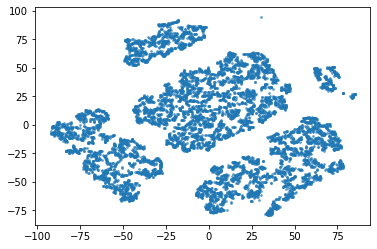

In [17]:
ZA = training_embedded
plt.scatter(ZA[:, 0], ZA[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                 edgecolor='k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.3723193
For n_clusters = 3 The average silhouette_score is : 0.42933166
For n_clusters = 4 The average silhouette_score is : 0.4401766
For n_clusters = 5 The average silhouette_score is : 0.43280992
For n_clusters = 6 The average silhouette_score is : 0.44129732
For n_clusters = 7 The average silhouette_score is : 0.44613147
For n_clusters = 8 The average silhouette_score is : 0.4392515
For n_clusters = 9 The average silhouette_score is : 0.43183473
For n_clusters = 10 The average silhouette_score is : 0.4268921
For n_clusters = 11 The average silhouette_score is : 0.43428987
For n_clusters = 12 The average silhouette_score is : 0.44525903
For n_clusters = 13 The average silhouette_score is : 0.4488715
For n_clusters = 14 The average silhouette_score is : 0.44397992
For n_clusters = 15 The average silhouette_score is : 0.42525673


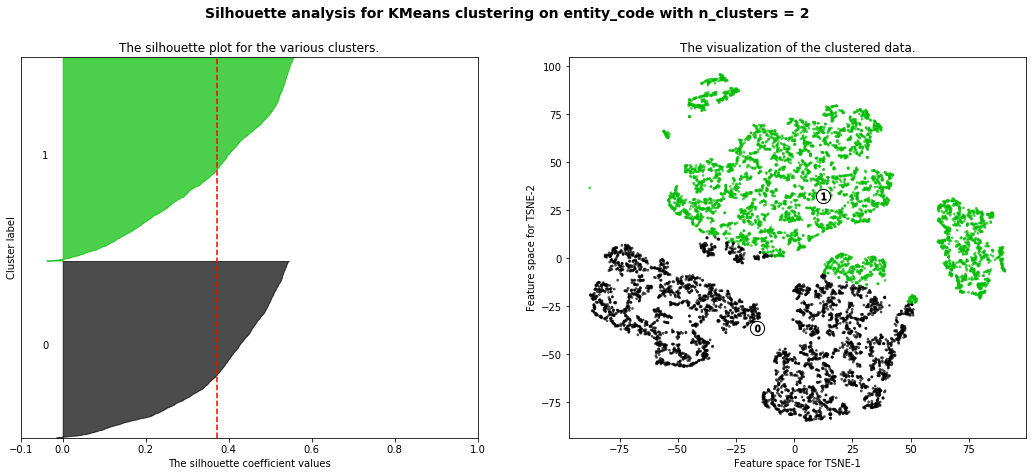

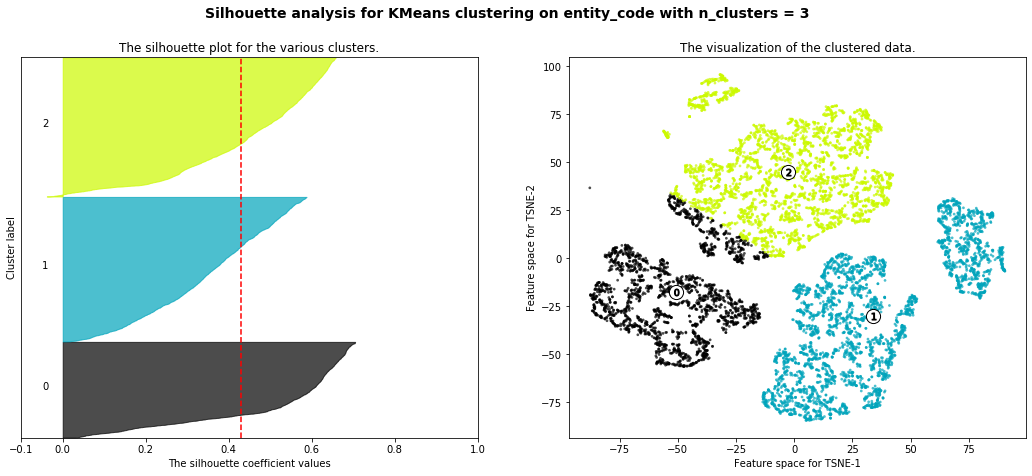

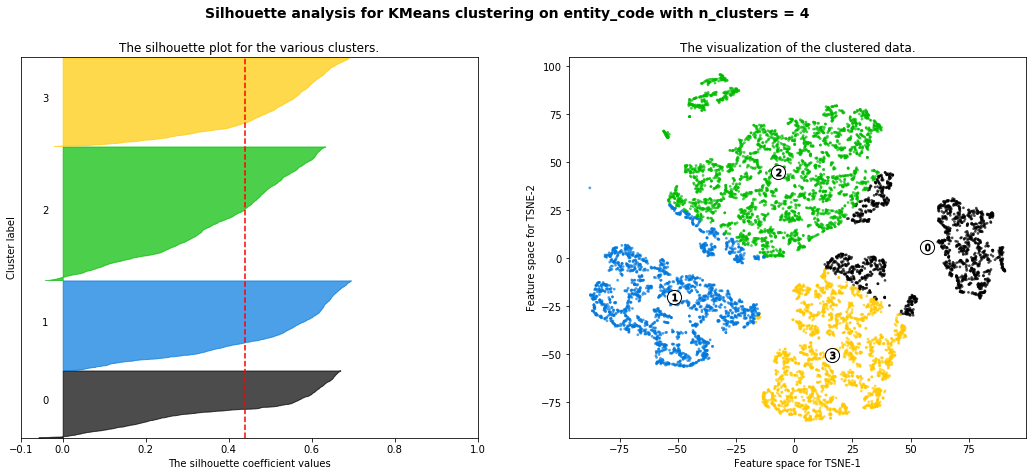

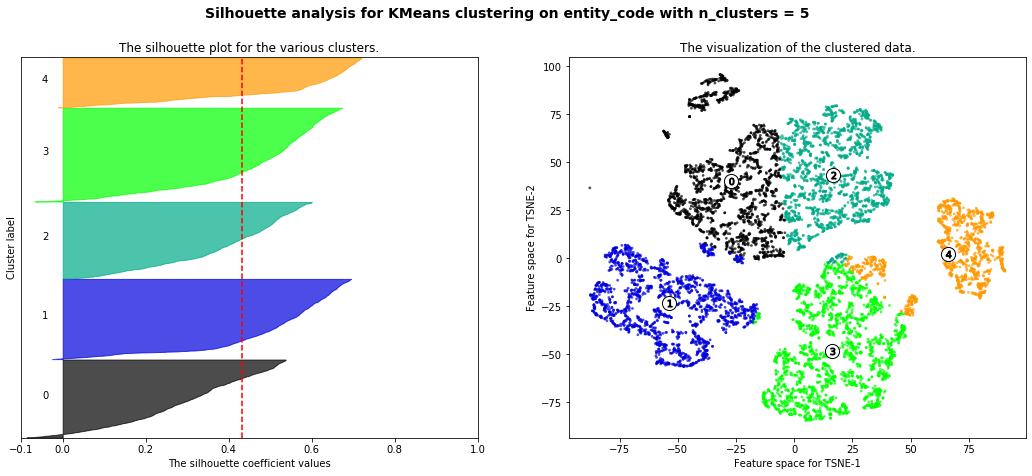

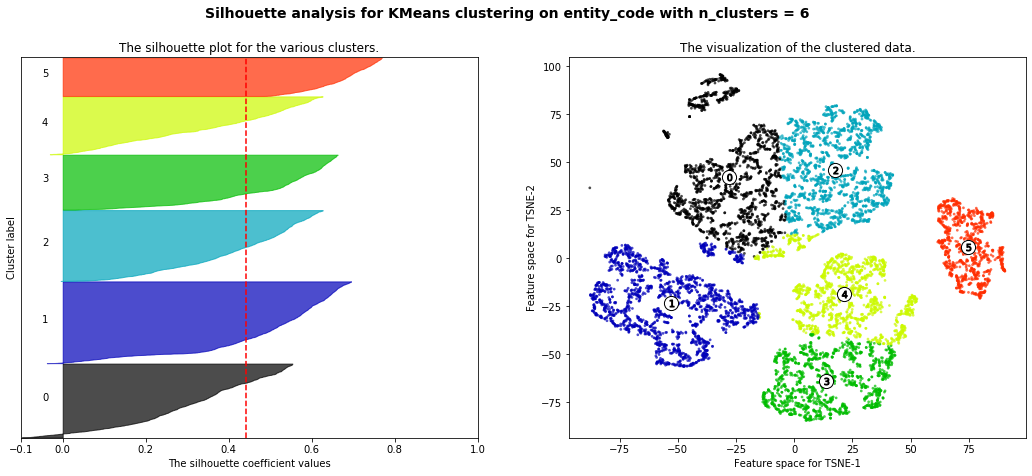

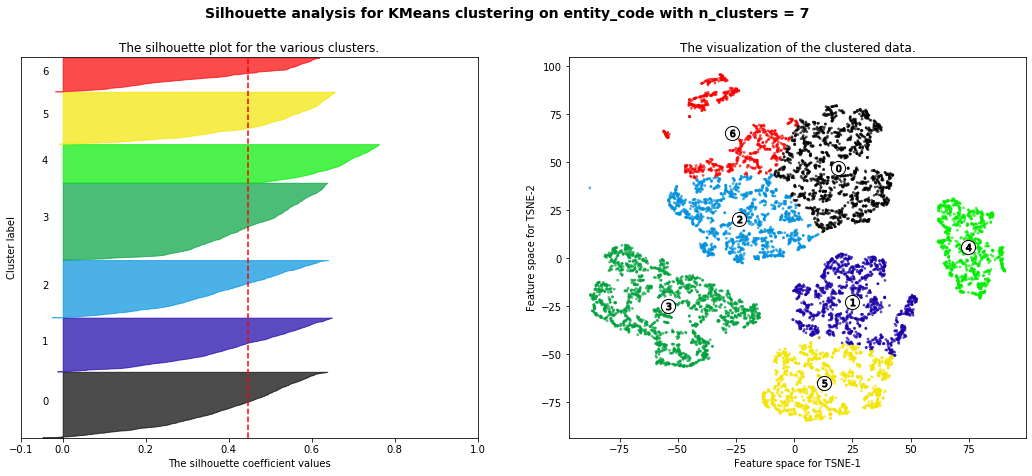

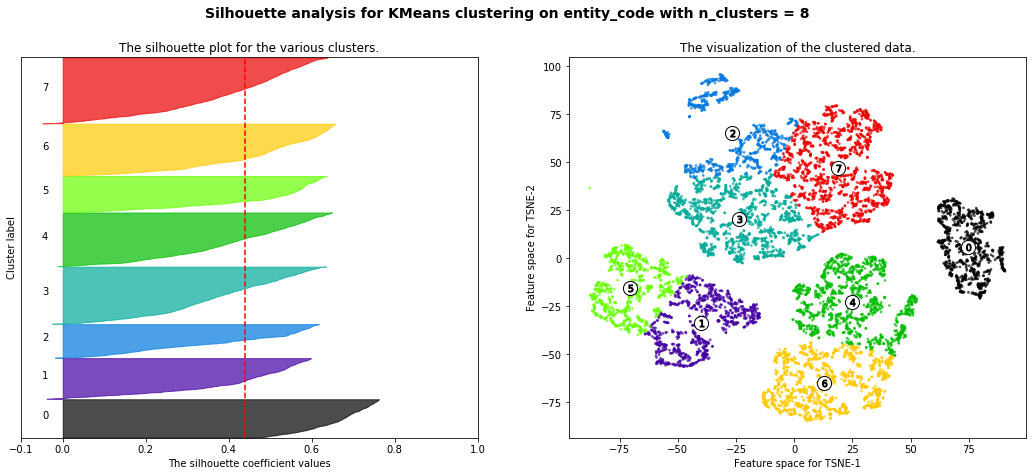

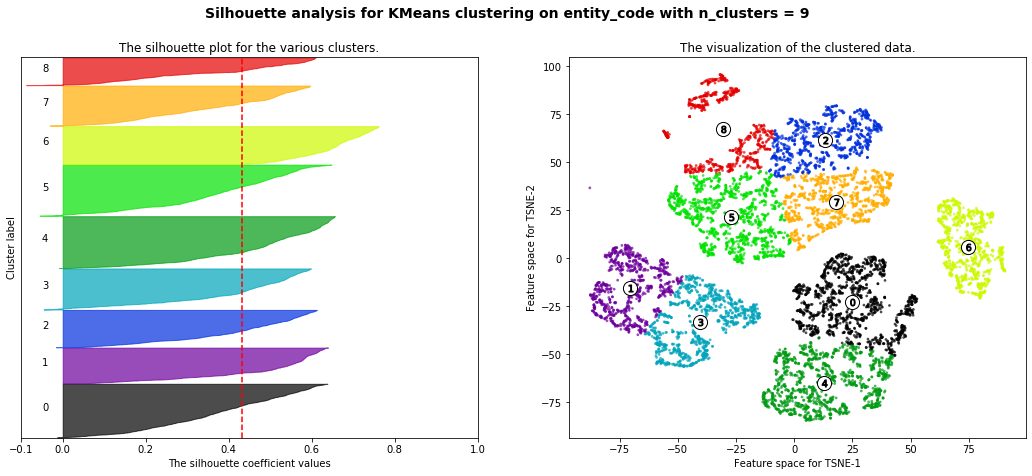

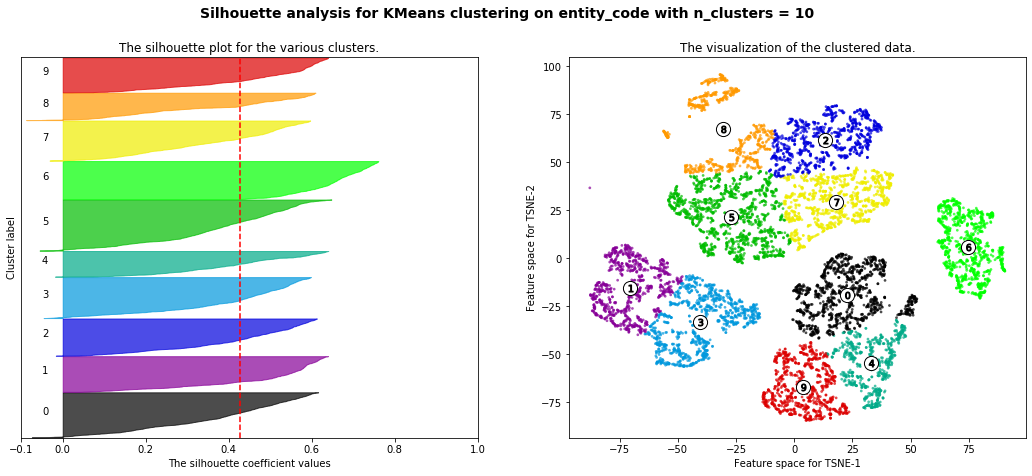

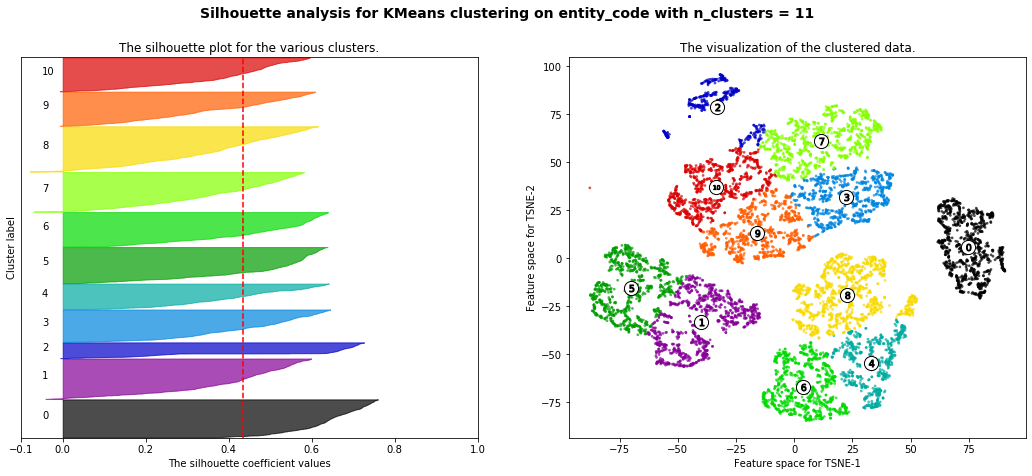

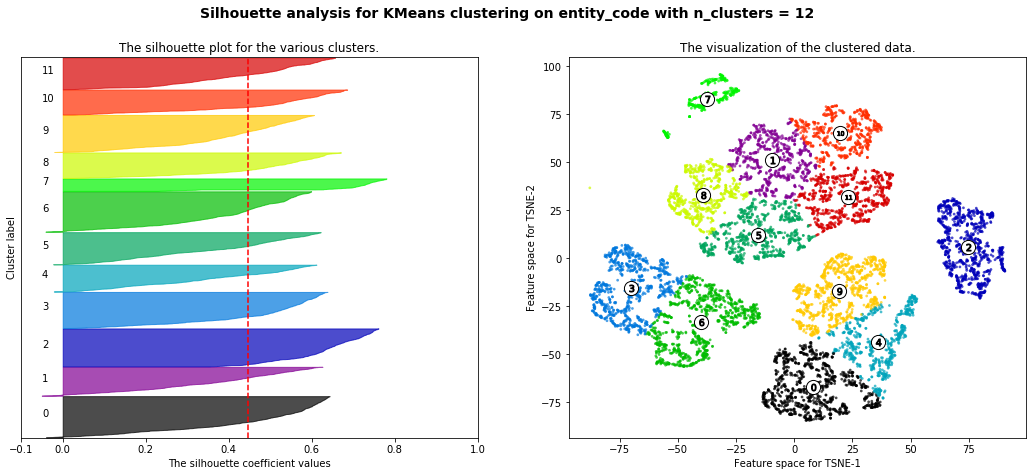

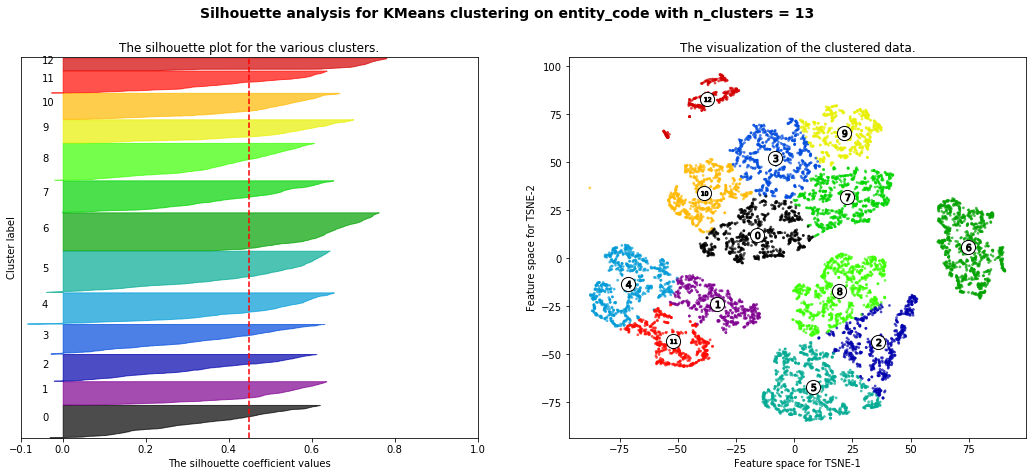

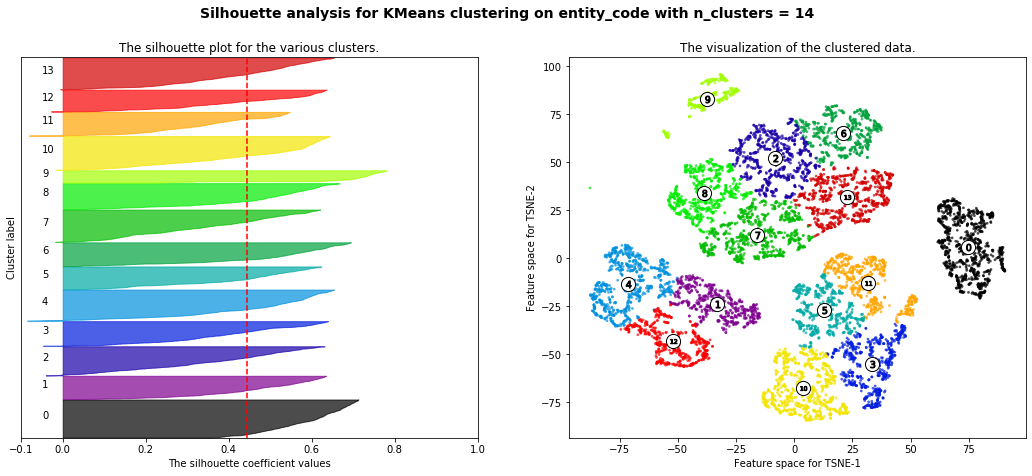

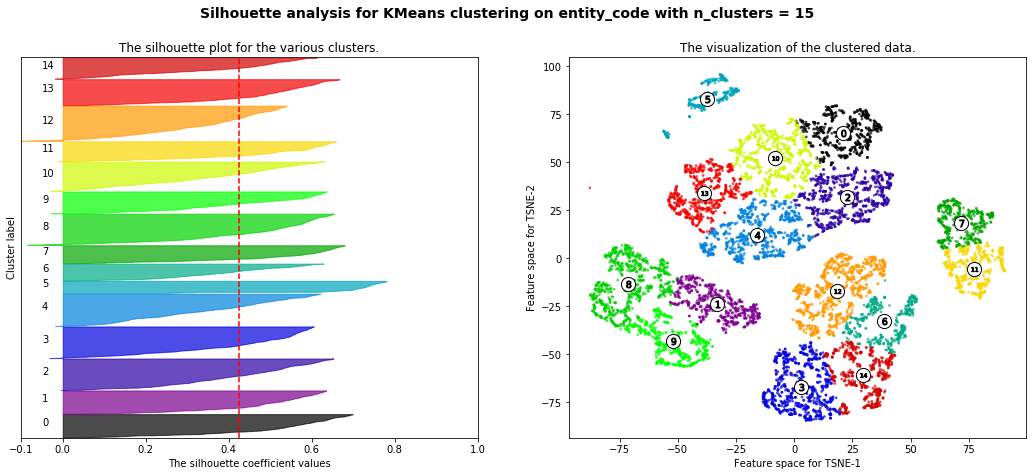

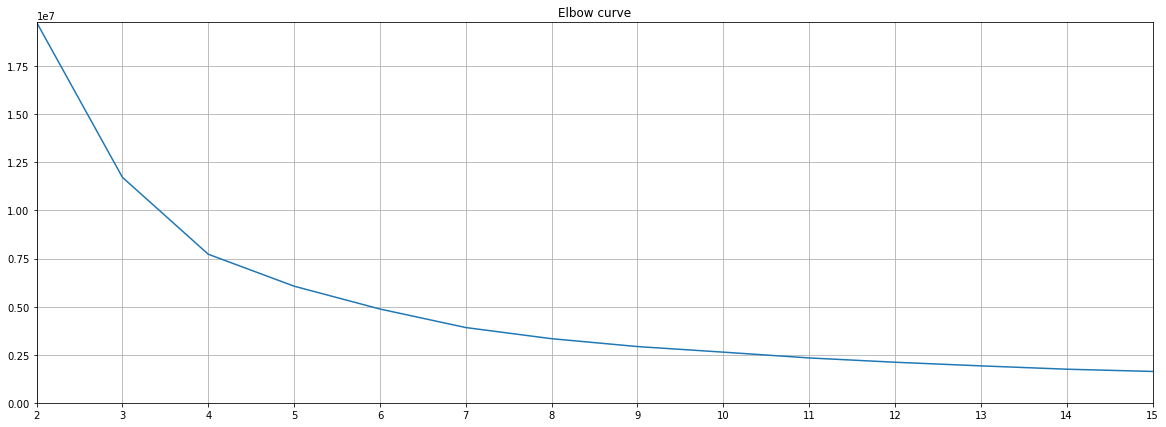

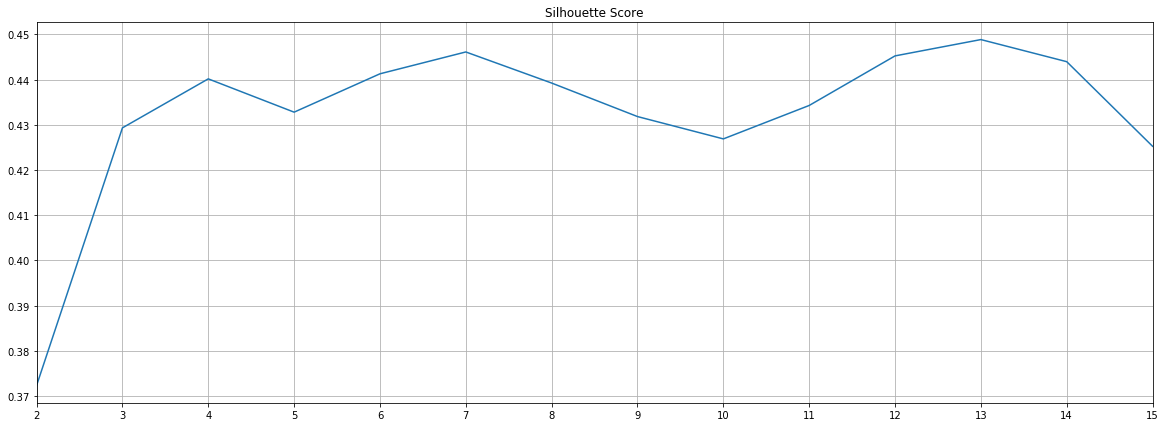

In [138]:
# Kmeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5,6,7,8,9,10,11, 12,13,14,15]
elbow = []
silhouette = []

# Training data
X = training_embedded

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
#     #Outpu Csv
#     output_temp = np.column_stack((gender, cluster_labels))
#     with open(r"C:\Users\86139\Desktop\Result_for_%dclusters.csv"%n_clusters, 'w+') as c:
#         writer = csv.writer(c, delimiter = ',')
#         writer.writerow(["gender", " ", " ", "label"])
#         for item in output_temp:
#             writer.writerow(item)
#     c.close()
    
    elbow.append(clusterer.inertia_)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    silhouette.append(silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for TSNE-1")
    ax2.set_ylabel("Feature space for TSNE-2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on entity_code "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

# The elbow curve figure
fig = plt.figure(figsize=(20, 7))
# plt.xlabel("Number of k")
# plt.ylabel("Sum of squared errors")
plt.xlim(range_n_clusters[0], range_n_clusters[-1])
plt.ylim(0., elbow[0])
plt.xticks(np.arange(range_n_clusters[0], range_n_clusters[-1] + 1, 1))

plt.plot(range_n_clusters, elbow)
plt.grid(True)
plt.title('Elbow curve')

plt.show()

# Silhouette score
fig = plt.figure(figsize=(20, 7))
# plt.xlabel('Number of k')
# plt.ylabel('Silhouette')
plt.xlim(range_n_clusters[0], range_n_clusters[-1])
# plt.ylim(0., silhouette[0])
plt.xticks(np.arange(range_n_clusters[0], range_n_clusters[-1] + 1, 1))

plt.plot(range_n_clusters, silhouette)
plt.grid(True)
plt.title('Silhouette Score')

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.37302893
For n_clusters = 3 The average silhouette_score is : 0.4309326
For n_clusters = 4 The average silhouette_score is : 0.45936996
For n_clusters = 5 The average silhouette_score is : 0.43422177
For n_clusters = 6 The average silhouette_score is : 0.42742443
For n_clusters = 7 The average silhouette_score is : 0.4098832
For n_clusters = 8 The average silhouette_score is : 0.40476528
For n_clusters = 9 The average silhouette_score is : 0.41815117


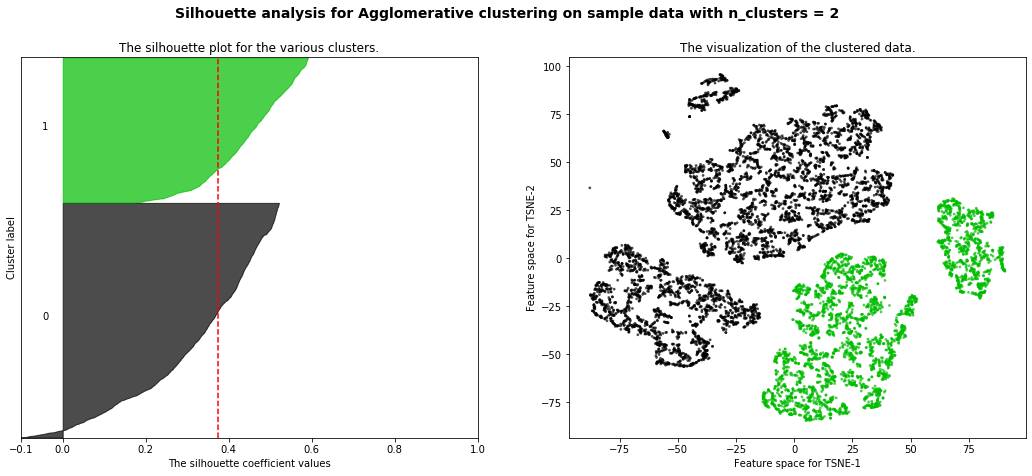

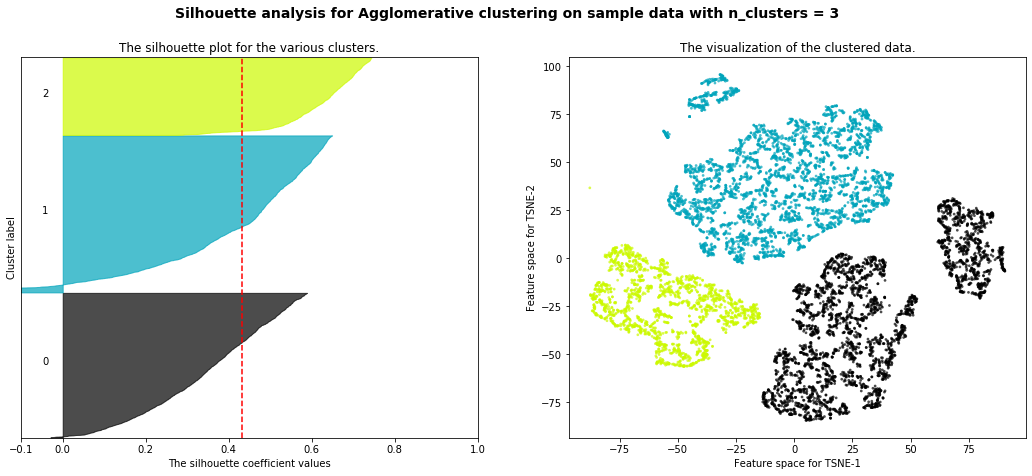

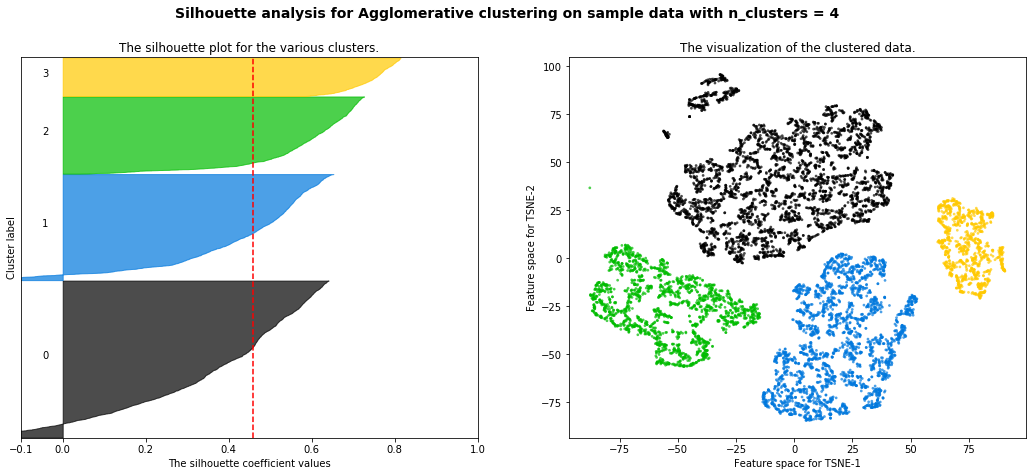

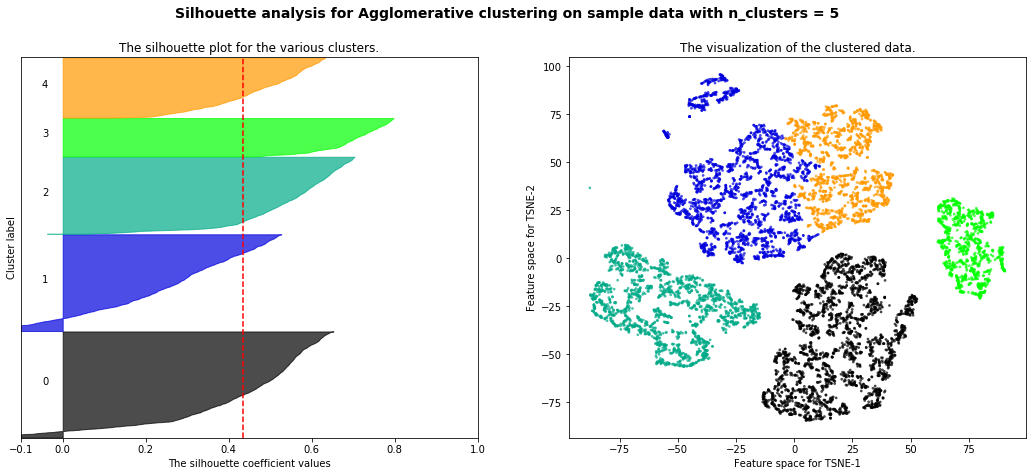

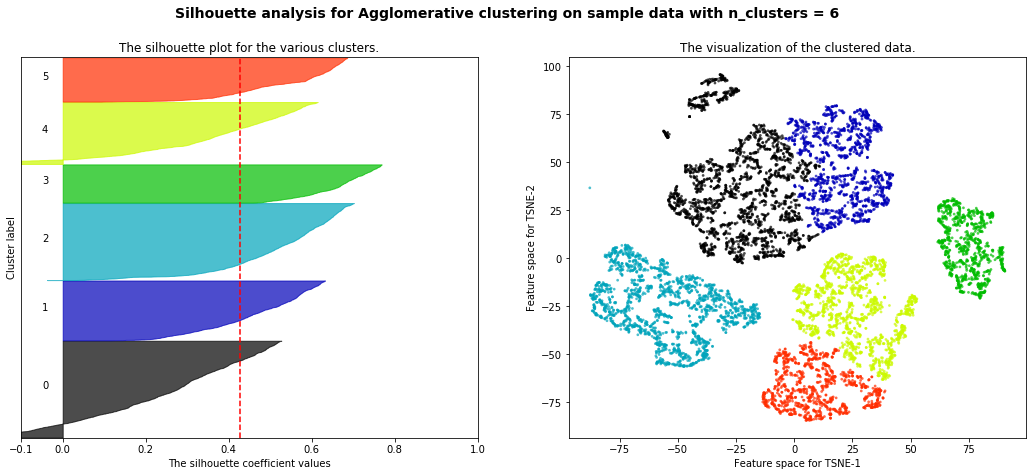

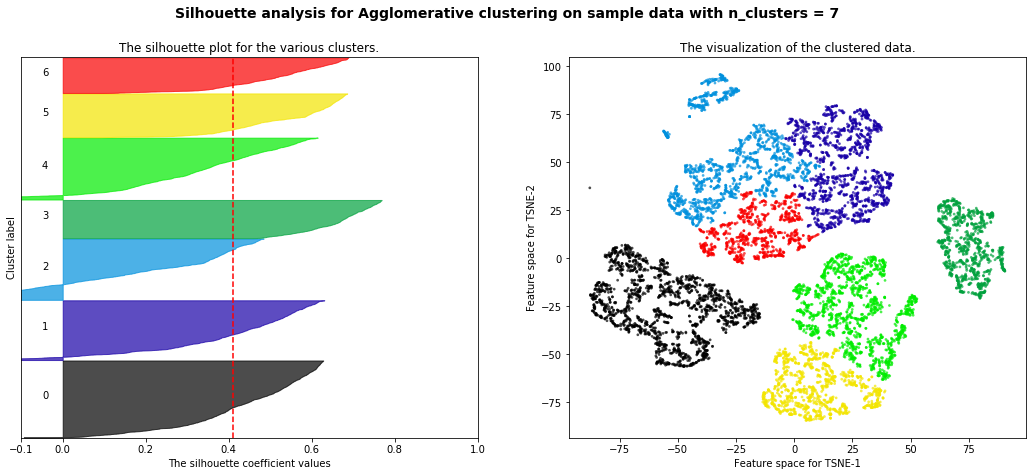

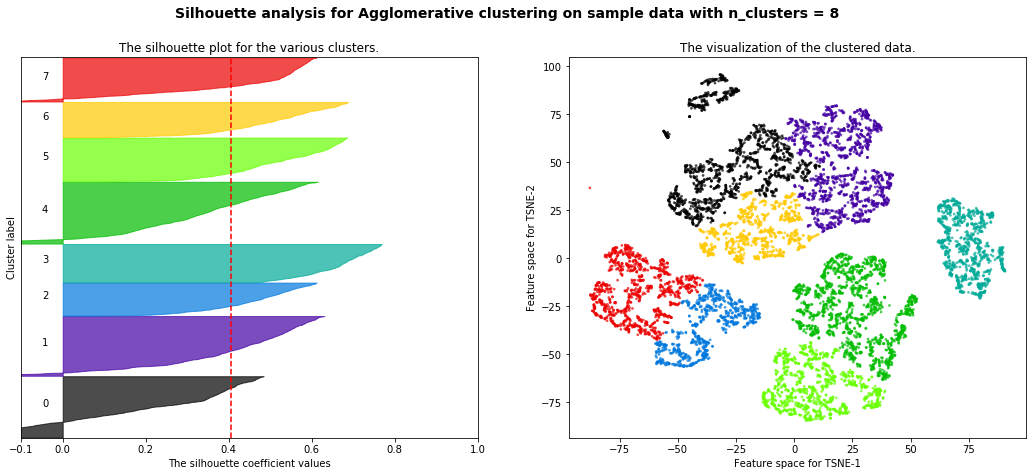

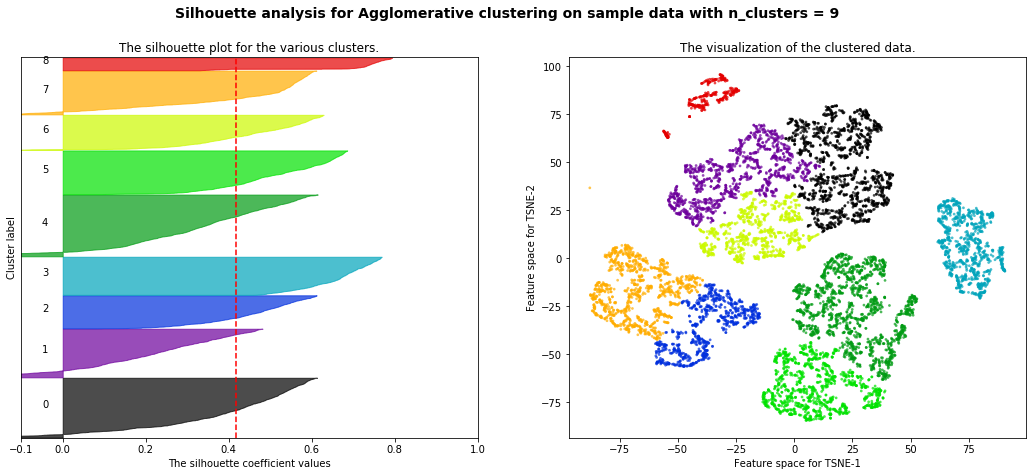

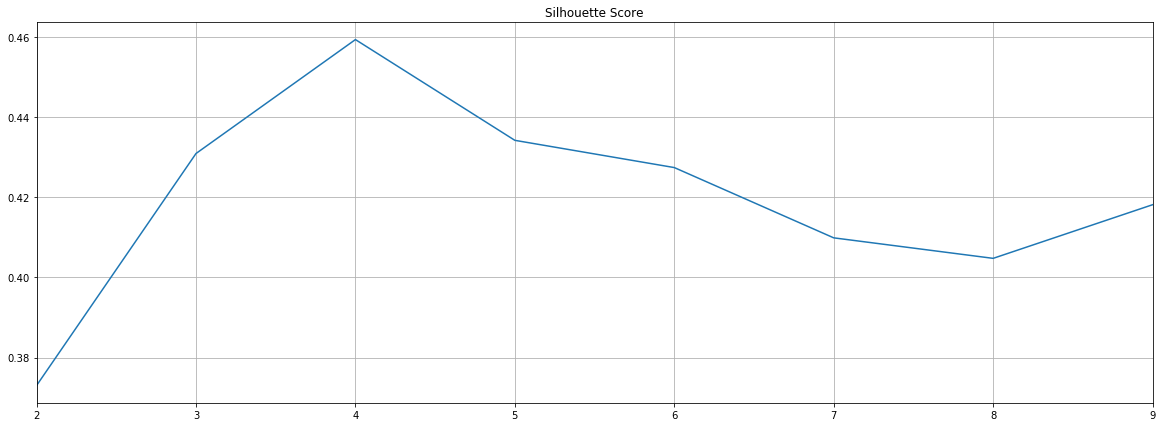

In [101]:
# Agglomerative
from sklearn.cluster import AgglomerativeClustering

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
silhouette = []

#Training Data
Y = training_embedded

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(Y) + (n_clusters + 1) * 10])

    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(Y)
    
    #output CSV
    res_column_names = ["labels","credentials", "p_type","no_serv","no_bene","no_dis_bene","ave_Me_pay","ave_Sub", "place of service", "gender", "drug"]
    if n_clusters == 5:
        output_temp = np.column_stack((cluster_labels, s_credentials, s_pro_type, training))
        with open(r"C:\Users\86139\Desktop\Result_for_%dclusters.csv"%n_clusters, 'w') as c:
            writer = csv.writer(c, delimiter = ',')
            writer.writerow(res_column_names)
            for item in output_temp:
                writer.writerow(item)
        c.close()
    

    silhouette_avg = silhouette_score(Y, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    silhouette.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Y, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(Y[:, 0], Y[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for TSNE-1")
    ax2.set_ylabel("Feature space for TSNE-2")

    plt.suptitle(("Silhouette analysis for Agglomerative clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

# Silhouette figure
fig = plt.figure(figsize=(20, 7))
# plt.xlabel("Number of k")
# plt.ylabel("Silhouette")
plt.xlim(range_n_clusters[0], range_n_clusters[-1])
# plt.ylim(0., silhouette[0])
plt.xticks(np.arange(range_n_clusters[0], range_n_clusters[-1] + 1, 1))

plt.plot(range_n_clusters, silhouette)
plt.grid(True)
plt.title('Silhouette Score')

plt.show()

For n_clusters = 4 The average silhouette_score is : 0.41556373


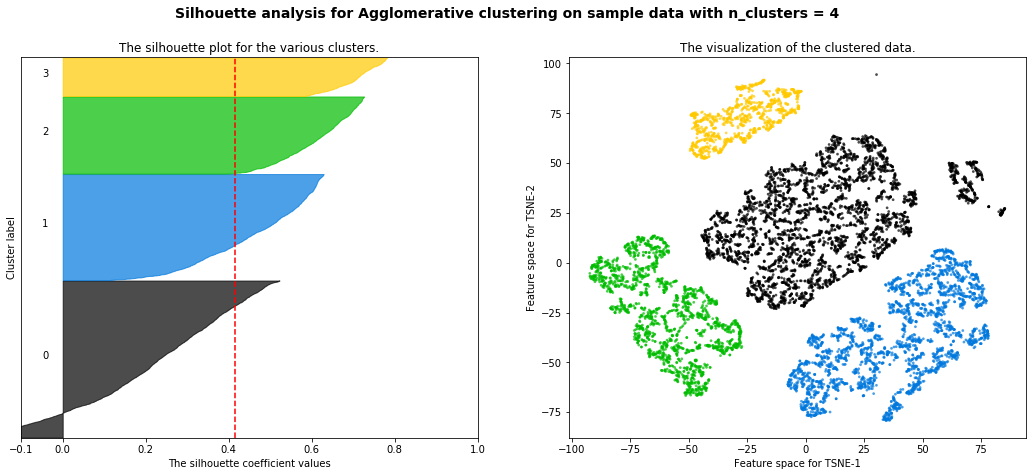

In [20]:
# Agglomerative
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [4]
silhouette = []

#Training Data
Y = training_embedded

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(Y) + (n_clusters + 1) * 10])

    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(Y)
    
#     output CSV
    res_column_names = ["labels","credentials", "p_type","no_serv","no_bene","no_dis_bene","ave_Me_pay","ave_Sub", "place of service", "gender", "drug"]
    if n_clusters == 4:
        output_temp = np.column_stack((cluster_labels, credentials, s_pro_type,data[:, 19:24],place_service,gender,drug ))
        with open(r"C:\Users\86139\Desktop\Result_for_4clusters.csv", 'w') as c:
            writer = csv.writer(c, delimiter = ',')
            writer.writerow(res_column_names)
            for item in output_temp:
                writer.writerow(item)
        c.close()
    df_res = pd.DataFrame(output_temp, columns = res_column_names)

    silhouette_avg = silhouette_score(Y, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    silhouette.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Y, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(Y[:, 0], Y[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for TSNE-1")
    ax2.set_ylabel("Feature space for TSNE-2")

    plt.suptitle(("Silhouette analysis for Agglomerative clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

# # Silhouette figure
# fig = plt.figure(figsize=(20, 7))
# # plt.xlabel("Number of k")
# # plt.ylabel("Silhouette")
# plt.xlim(range_n_clusters[0], range_n_clusters[-1])
# # plt.ylim(0., silhouette[0])
# plt.xticks(np.arange(range_n_clusters[0], range_n_clusters[-1] + 1, 1))

# plt.plot(range_n_clusters, silhouette)
# plt.grid(True)
# plt.title('Silhouette Score')

# plt.show()

In [46]:
# ["labels","credentials", "p_type","no_serv","no_bene","no_dis_bene","ave_Me_pay","ave_Sub", "place of service", "gender", "drug"]
df_nume = df_res[["labels","no_serv","no_bene","no_dis_bene","ave_Me_pay","ave_Sub"]].astype(float).groupby('labels')
print(df_nume.mean())
print(df_nume.std())

df_0 = df_res[df_res['labels'] == 0].reset_index()
df_1 = df_res[df_res['labels'] == 1].reset_index()
df_2 = df_res[df_res['labels'] == 2].reset_index()
df_3 = df_res[df_res['labels'] == 3].reset_index()
# print(pd.value_counts(df_0['credentials']))
# print(pd.value_counts(df_1['credentials']))
print(pd.value_counts(df_2['credentials']))
# print(pd.value_counts(df_3['credentials']))
a = df_res[(df_res.labels==2)&(df_res.drug=="Y")].index.tolist()
df_drug = df_res.iloc[a]
df_drug


           no_serv    no_bene  no_dis_bene  ave_Me_pay     ave_Sub
labels                                                            
0.0     133.357027  73.192177   119.432334   78.485939  189.666464
1.0      77.933282  58.973776    75.028538   87.118246  334.311952
2.0     124.117709  58.059915   106.644221   68.401748  155.172089
3.0      84.416222  56.372465    77.897545   90.128294  358.044125
           no_serv    no_bene  no_dis_bene  ave_Me_pay     ave_Sub
labels                                                            
0.0     216.267831  92.209441   183.810345   72.917680  237.557268
1.0     118.699287  78.589608   114.188295   73.232224  350.360359
2.0     215.614188  71.072184   164.841746   58.475720  164.204358
3.0     143.534957  75.110496   125.099525   61.797454  354.289980
MD              917
Other           265
PA              156
DO              101
Organization     91
PT               86
OD               52
NP               51
FNP              47
DPT             

labels credentials              p_type no_serv no_bene no_dis_bene  \
20        2          MD     Family Practice      30      30          30   
21        2          MD     Family Practice      21      21          21   
95        2        ARNP  Nurse Practitioner      13      13          13   
133       2          MD     Family Practice      25      24          25   
361       2          DO   Internal Medicine      15      15          15   
...     ...         ...                 ...     ...     ...         ...   
8313      2          MD     Family Practice      27      27          27   
8436      2          MD   Internal Medicine      13      13          13   
8746      2          MD   Internal Medicine      21      21          21   
8758      2          MD   Internal Medicine      55      55          55   
9055      2       Other  Nurse Practitioner      38      25          38   

        ave_Me_pay       ave_Sub place of service gender drug  
20           49.03            73                O      F    Y  
21    98.002380952           156                O      F    Y  
95           19.03            55                O      F    Y  
133          19.03            41                O      F    Y  
361   95.883333333  142.66666667                O      F    Y  
...            ...           ...              ...    ...  ...  
8313  187.06444444           295                O      F    Y  
8436         98.85           180                O      F    Y  
8746         17.84            35                O      F    Y  
8758  38.054545455  38.054545455                O      F    Y  
9055  2.9105263158            10                O      F    Y  

[116 rows x 11 columns]

In [34]:
with open(r"C:\Users\86139\Desktop\Outliers.csv", 'w+') as c:
    writer = csv.writer(c, delimiter = ',')
    writer.writerow(column_names)
    for item in raw_data[delete]:
        writer.writerow(item)
c.close()
